In [18]:
import scipy
import cv2, requests
import numpy as np
import numpy
import tensorflow.python.platform
import tensorflow as tf
from scipy import misc
import os
import pandas as pd
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import scipy.io as sio
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from scipy.spatial import distance
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

In [2]:
features = pd.read_csv('../dataframe_pca.csv', index_col=0)
features = features.values

In [3]:
orderOfImageRead = pd.read_csv('image_numbers.txt', header=None)

In [4]:
orderOfImageRead[0] = orderOfImageRead[0].map(lambda x: x.lstrip('image_').rstrip('.jpg'))
orderOfImageRead[0] = pd.to_numeric(orderOfImageRead[0])

a = orderOfImageRead.values
a = a.reshape(8189)

In [5]:
import operator

tuple_index=[]
for i in range(0,8189):
    tuple_index.append((i,a[i]))

tuple_index = sorted(tuple_index, key=operator.itemgetter(1))

In [11]:
features4=[]
for i in range(2188,2752):
    features4.append(features[tuple_index[i][0]])

In [30]:
labels = sio.loadmat('imagelabels.mat')
l = labels["labels"]

imagelabels4 = []
for i in range(2188,2752):
    imagelabels4.append(l[0][i-1])

labels = pd.DataFrame(data=imagelabels4)

In [13]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vis_data = model.fit_transform(features4)

In [14]:
from matplotlib import pyplot as plt
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]

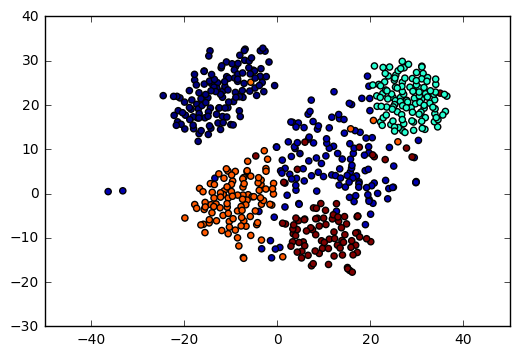

In [15]:
plt.scatter(vis_x, vis_y, c=imagelabels4)
plt.show()

In [24]:
newFeatures_df = pd.DataFrame(data=features4)
newFeatures_df.to_csv('features(15to19).csv')

In [25]:
arr = np.zeros((len(features4),len(features4)), dtype=np.float)

for i in range(0,len(features4)):
    for j in range(i,len(features4)):
        arr[i][j] = distance.euclidean(features4[i],features4[j])

In [26]:
X = csr_matrix(arr)
Tcsr = minimum_spanning_tree(X)

In [27]:
df_SpanTree = pd.DataFrame(data=Tcsr.toarray().astype(float))
df_SpanTree.to_csv('SpanTree(15to19.csv)')

# SVM Verification

In [29]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [31]:
X = newFeatures_df
y = labels

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7)

In [33]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
clf.score(X_test, y_test)

0.95132743362831862